In [5]:
#Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


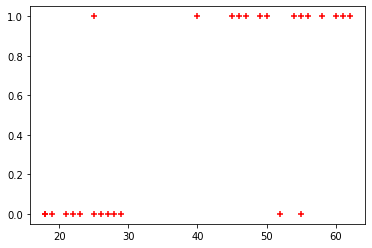

In [6]:
# plotting the outcome and independent variables to see the visual correlation
plt.scatter(df.age, df.bought_insurance, marker = "+", color = "red")

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test =train_test_split(df[["age"]], df.bought_insurance, train_size=0.9)

In [11]:
X_test

,age
12,27
3,52
8,62


In [13]:
X_train.head()

,age
20,21
4,46
13,29
24,50
10,18


In [15]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.predict(X_test)

array([0, 1, 1])

In [29]:
lr.score(X_test, y_test)

0.6666666666666666

In [24]:
y_pred = lr.predict_proba(X_test)
prob = pd.DataFrame(y_pred)

,0,1
0,0.811334,0.188666
1,0.075734,0.924266
2,0.016529,0.983471


In [36]:
X_test


,age
12,27
3,52
8,62


In [41]:
#Exercise: we are looking for the which variable has affected the employee left or retention after making some data exploration
hr = pd.read_csv("hr.csv")
hr.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
left = hr[hr.left ==1]
left.shape

(3571, 10)

In [47]:
retained = hr[hr.left == 0]
retained.shape

(11428, 10)

In [48]:
#average numbers of all columns

hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

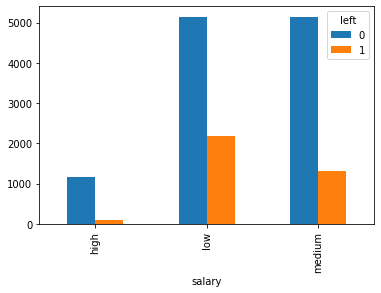

In [50]:
#since the salary column does not hold numerical value, we are obliged to cehcl it visually, and so we will convert it to the dummies later.

pd.crosstab(hr["salary"], hr["left"]).plot(kind = "bar")

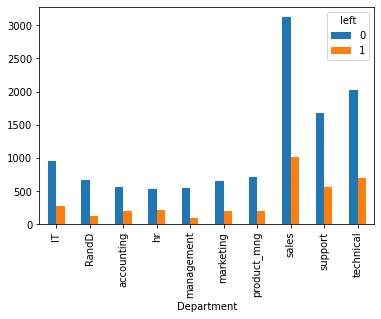

In [51]:
pd.crosstab(hr["Department"], hr["left"]).plot(kind = "bar")

In [ ]:
#Now we will use the Salary, promotion last 5 years , average monthly salary and satisfaction level as our independent/Xvariables/Input features

In [56]:
indep = hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
indep.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [59]:
#Now we must convert salary to dummy variables (One hot encoding)

dumm_sal = pd.get_dummies(indep["salary"], prefix = "salary")
dumm_sal

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [69]:
#Now we will concatinate into our original independent features and drop the originals salary column off.

hr_with_dummies = pd.concat([indep, dumm_sal], axis = "columns")
hr_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [93]:
#easy way for seeing the correlation numerically 
hr_with_dummies.corr()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,-0.020048,0.025605,0.029708,-0.047415,0.031367
average_montly_hours,-0.020048,1.000000,-0.003544,-0.007101,-0.001050,0.005007
promotion_last_5years,0.025605,-0.003544,1.000000,0.076756,-0.082832,0.040985
salary_high,0.029708,-0.007101,0.076756,1.000000,-0.292560,-0.260274
salary_low,-0.047415,-0.001050,-0.082832,-0.292560,1.000000,-0.847144
salary_medium,0.031367,0.005007,0.040985,-0.260274,-0.847144,1.000000


In [74]:
#dropping the original salary off the table
hr_with_dummies.drop("salary", axis = "columns", inplace = True)


In [73]:
hr_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [75]:
X = hr_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [77]:
#predictor
y = hr.left

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [82]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
lr.predict_proba(X_test)

array([[0.53138047, 0.46861953],
       [0.77999684, 0.22000316],
       [0.7998708 , 0.2001292 ],
       ...,
       [0.83310681, 0.16689319],
       [0.82381935, 0.17618065],
       [0.7735528 , 0.2264472 ]])

In [85]:
#Accuracy for model

lr.score(X_test, y_test)

0.7745714285714286